In [110]:
#import array (matrix) module
import numpy

#import plotting module (imshow) and configure outputs to be shown inline
import matplotlib.pyplot
%matplotlib inline

#import scipy.special for the sigmoid function expit()
import scipy.special

#import scipy.ndimage for image rotation
import scipy.ndimage

In [21]:
#neural network class definition
class NeuralNetwork:
    
    #initialize the neural network
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        
        #assign initial values
        self.inputNodes = inputNodes
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        self.learningRate = learningRate
        
        #create weight matrices
        weightOffset = -0.5
        self.weightMatrixIH = numpy.random.normal(0, pow(self.hiddenNodes, weightOffset), (self.hiddenNodes, self.inputNodes))
        self.weightMatrixHO = numpy.random.normal(0, pow(self.outputNodes, weightOffset), (self.outputNodes, self.hiddenNodes))
        
        #define activation function
        self.activationFunction = lambda x: scipy.special.expit(x)
        
        pass
    
    #train the neural network
    def train(self, inputList, targetList):
        
        #convert input lists to 2d arrays
        inputs = numpy.array(inputList, ndmin=2).T
        targets = numpy.array(targetList, ndmin=2).T
        
        #perform query, see query() for detailed comments
        hiddenInputs = numpy.dot(self.weightMatrixIH, inputs)
        hiddenOutputs = self.activationFunction(hiddenInputs)
        finalInputs = numpy.dot(self.weightMatrixHO, hiddenOutputs)
        finalOutputs = self.activationFunction(finalInputs)
        
        #calculate output error (target - output)
        outputErrors = targets - finalOutputs
        
        #hidden layer error is the output error split by weights and recombined at the hidden nodes
        hiddenErrors = numpy.dot(self.weightMatrixHO.T, outputErrors)
        inputErrors = numpy.dot(self.weightMatrixIH.T, hiddenErrors)
        
        #update weights based on error
        self.weightMatrixHO += self.learningRate * numpy.dot((outputErrors * finalOutputs * (1 - finalOutputs)), numpy.transpose(hiddenOutputs))
        self.weightMatrixIH += self.learningRate * numpy.dot((hiddenErrors * hiddenOutputs * (1 - hiddenOutputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, inputList):
        
        #convert input list to 2d array
        inputs = numpy.array(inputList, ndmin=2).T
        
        #calculate sifnals into the hidden layer
        # --> X_H = W_IH . I
        hiddenInputs = numpy.dot(self.weightMatrixIH, inputs)
        
        #calculate the signals emerging from the hidden layer
        # --> O_H = sigmoid(X_H)
        hiddenOutputs = self.activationFunction(hiddenInputs)
        
        #calculate the signals into the final output layer
        # --> X_O = W_HO . O_H
        finalInputs = numpy.dot(self.weightMatrixHO, hiddenOutputs)
        
        #calculate the signals emerging from the final output layer
        # --> O = sigmoid(X_O)
        finalOutputs = self.activationFunction(finalInputs)
        
        return finalOutputs
    
    pass

In [22]:
#function for loading the contents of the file into memory
def loadDataList(filePath):
    data_file = open(filePath, 'r')
    data_list = data_file.readlines()
    data_file.close()
    return data_list

In [23]:
#function for constructing targets for image recognition
def constructTargets(target, outputNodes):
    targets = numpy.zeros(outputNodes) + 0.01
    targets[target] = 0.99
    return targets

In [24]:
#function for constructing scaled input values from a data list
def constructInputs(allValues):
    return (numpy.asfarray(allValues[1:]) / 255 * 0.99) + 0.01

In [25]:
#function for creating a 28x28 image from a single data item
def createImage(allValues):
    return numpy.asfarray(allValues[1:]).reshape((28,28))

In [141]:
#create instance neural network for image recognition
nodes = [784, 200, 10]
learningRate = 0.01
network = NeuralNetwork(nodes[0], nodes[1], nodes[2], learningRate)

In [146]:
#
# Training the Neural Network
#

#load training data
trainingDataList = loadDataList("/Users/Priebe/Library/Mobile Documents/com~apple~CloudDocs/Python/NeuralNetwork/MNIST/mnist_train.csv")

#epochs is the number of times the training set is used
epochs = 10

for e in range(epochs):
    
    #train neural network
    for index in range(len(trainingDataList)-1):
        
        #basic training
        allValues = trainingDataList[index].split(',')
        inputs = constructInputs(allValues)
        targets = constructTargets(int(allValues[0]), nodes[2])
        network.train(inputs, targets)
        
        #+10degree image rotation training
        inputsPlus10Degrees = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, reshape=False)
        network.train(inputsPlus10Degrees.reshape(784), targets)
        
        #-10degree image rotation training
        inputsMinus10Degrees = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, reshape=False)
        network.train(inputsMinus10Degrees.reshape(784), targets)
        
        pass
    pass

In [147]:
#
# Testing the Neural Network
#

#load testing data
testingDataList = loadDataList("/Users/Priebe/Library/Mobile Documents/com~apple~CloudDocs/Python/NeuralNetwork/MNIST/mnist_test.csv")

#create scoreboard
scoreboard = []

#go through all the records in the data set
for record in testingDataList:
    allValues = record.split(',')
    correctLabel = allValues[0]
    outputs = network.query(constructInputs(allValues))
    predictedLabel = numpy.argmax(outputs)
    if (int(predictedLabel) == int(correctLabel)):
        scoreboard.append(1)
    else:
        scoreboard.append(0)
        pass
    #print(correctLabel, "correct label")
    #print(predictedLabel, "networks answer")
    pass

In [148]:
#
# Calculating performance
#

scoreArray = numpy.asarray(scoreboard)
print("Performance =", scoreArray.sum() / scoreArray.size)

Performance = 0.9711


prediction = 7


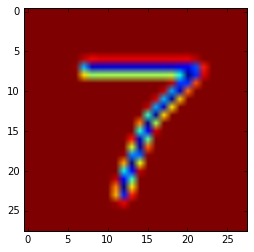

In [145]:
#
# Testing my own images
#

#importing an image
import scipy.misc
img_array = scipy.misc.imread("/Users/Priebe/Library/Mobile Documents/com~apple~CloudDocs/Python/NeuralNetwork/Images/image00.png", flatten=True)
img_data = 255 - img_array.reshape(784)
img_data = (img_data / 255 * 0.99) + 0.01

#testing the output
matplotlib.pyplot.imshow(img_array)
outputs = network.query(img_data)
print("prediction =", numpy.argmax(outputs))